# WEB SCRAPING-ASSIGNMENT - 3

## Exercise 1 &2:

In [2]:
#Lets import all the necessary libraries 

import selenium                                     #library that is used to work with Selenium
from selenium import webdriver                      # importing webdriver module from selenium to open automated chrome window
import pandas as pd                                 # To create a Database
from selenium.webdriver.common.by import By         # importing inbuilt class By
import warnings
warnings.filterwarnings('ignore')                   # to ignore any sort of warning
import time                                         #used to stop search engine for a few secods

#Importing required Exceptions which needs to be handled
from selenium.common.exceptions import StaleElementReferenceException , NoSuchElementException

#importing regax
import re


In [3]:
driver = webdriver.Chrome('chromedriver.exe') # Lets connect to the web driver

In [231]:
#Opening up amazon.in website on automated chrome window

url = 'https://www.amazon.in/'
driver.get(url)

In [232]:
#finding the web element for the Search bar and enter user input for entering a product
Product = input('Type the name of the product you wish to search for ')
search_prod = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input") 
search_prod.send_keys(Product)

Type the name of the product you wish to search for guitar


In [233]:
#clicking using absolute xpath function to click the search button after user entered the name of the product

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_btn.click()

In [234]:
#fetching Urls from 3 pages to open each product page and get the desired features

Prod_url =[]

start = 0

end = 3

for page in range(start,end):
    url = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        Prod_url.append(i.get_attribute('href')) #to retrieve any link we use get attribute
    next_button = driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]') #to scrap data from the next page 
    next_button.click()
    time.sleep(3)

In [235]:
len(Prod_url) #we have acquired the links of the product in 3 search pages

192

In [236]:
#To scrap data from multiple pages with brand name alone from amazon 

brand_name  = []


for i in Prod_url:
    driver.get(i)
    time.sleep(0)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[6]/div[4]/div[4]/div[40]/div/table/tbody/tr[1]/td[2]/span')
        brand_name.append(description.text)
    except NoSuchElementException :
        brand_name.append('-')
    

In [237]:
#To scrap data from multiple pages with prod name alone from amazon 

prod_name  = []


for i in Prod_url:
    driver.get(i)
    time.sleep(0)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[1]/div/h1/span')
        prod_name.append(description.text)
    except NoSuchElementException :
        prod_name.append('-')

In [238]:
#To scrap data from multiple pages with prod price alone from amazon 

prod_price  = []


for i in Prod_url:
    driver.get(i)
    time.sleep(0)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[10]/div[3]/div[1]/span/span[2]/span[2]')
        prod_price.append(description.text)
    except NoSuchElementException :
        prod_price.append('-')

In [239]:
#To scrap data from multiple pages with return/Exchange alone from amazon 

return_exchange  = []


for i in Prod_url:
    driver.get(i)
    time.sleep(0)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[21]/div[2]/div/div/div/div[2]/span/div[2]/a')
        return_exchange.append(description.text)
    except NoSuchElementException :
        return_exchange.append('-')

In [240]:
#To scrap data from multiple pages with Expected Delivery alone from amazon 

Exp_Delivery  = []


for i in Prod_url:
    driver.get(i)
    time.sleep(0)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[1]/div[3]/div/div/div/div/form/div/div/div/div/div[3]/div/div[2]/div[8]/div[1]/div/div/div[2]/span/span[1]')
        Exp_Delivery.append(description.text)
    except NoSuchElementException :
        Exp_Delivery.append('-')

In [241]:
#To scrap data from multiple pages with Prod_availability  alone from amazon 

prod_avail  = []


for i in Prod_url:
    driver.get(i)
    time.sleep(0)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[1]/div[3]/div/div/div/div/form/div/div/div/div/div[3]/div/div[4]/div/div[1]/span')
        prod_avail.append(description.text)
    except NoSuchElementException :
        prod_avail.append('-')

In [242]:
#Creating a DataFrame with the extracted elements
import pandas as pd

Product = pd.DataFrame()
Product['Brand_name'] = brand_name
Product['Product name'] = prod_name
Product['Price'] = prod_price
Product['Return/Exchange'] = return_exchange
Product['Expected Delivery'] = Exp_Delivery
Product['Availability'] = prod_avail
Product['Product link'] = Prod_url

In [245]:
Product

,Brand_name,Product name,Price,Return/Exchange,Expected Delivery,Availability,Product link
0,-,Kadence Slowhand Premium Jumbo Semi Acoustic G...,-,-,-,-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,-,Bestonl String Decor Guitar Children's Musical...,899,-,"Monday, 28 November",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,-,Vault DA40 41 Inch Premium Solid Spruce-Top Dr...,"6,930",-,"Monday, 28 November",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,-,-,-,-,-,-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,-,-,-,-,-,-,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
187,-,-,-,-,-,-,https://www.amazon.in/Epiphone-String-Electric...
188,-,"SG Musical - Store - Capo, Quick Change Capo F...",249,-,"Wednesday, 30 November",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
189,-,-,-,-,-,-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
190,-,SG Musical - Silver - - Capo For Acoustic Guit...,249,-,"Wednesday, 30 November",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


In [246]:
#Creating file csv to file 

Product.to_csv('Product_amazon.csv', index =True)

# Excercise 3:

## scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [112]:
#Opening up google images website on automated chrome window

url = 'https://www.google.co.in/imghp?hl=en&ogbl'
driver.get(url)

In [113]:
#finding the web element for the Search bar and enter fruits
search_prod = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input") 
search_prod.send_keys('fruits')

In [114]:
#clicking using absolute xpath function to click the search button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
search_btn.click()

In [115]:
#fetching Url of images for 10 images in the search page

Img_url = []
url = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in url:
    Img_url.append(i.get_attribute('src')) #to retrieve any link we use get attribute
    time.sleep(0)


''
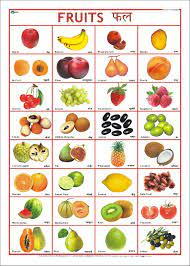

In [116]:
Img_url[10]

''
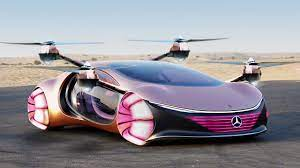

In [118]:
#Opening up google images website on automated chrome window

url = 'https://www.google.co.in/imghp?hl=en&ogbl'
driver.get(url)

#finding the web element for the Search bar and enter cars
search_prod = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input") 
search_prod.send_keys('cars')

#clicking using absolute xpath function to click the search button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
search_btn.click()


#fetching Url of images for 10 images in the search page

Img_url2 = []
url = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in url:
    Img_url2.append(i.get_attribute('src')) #to retrieve any link we use get attribute
    time.sleep(0)
Img_url2[10]

''
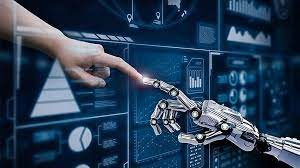

In [89]:
#Opening up google images website on automated chrome window

url = 'https://www.google.co.in/imghp?hl=en&ogbl'
driver.get(url)

#finding the web element for the Search bar and enter Machine Learning
search_prod = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input") 
search_prod.send_keys('Machine Learning')

#clicking using absolute xpath function to click the search button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
search_btn.click()

#fetching Url of images for 10 images in the search page

Img_url3 = []
url = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in url:
    Img_url3.append(i.get_attribute('src')) #to retrieve any link we use get attribute
    time.sleep(0)
Img_url3[10]

''
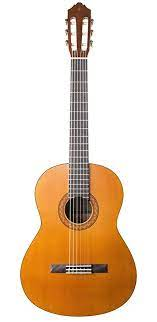

In [90]:
#Opening up google images website on automated chrome window

url = 'https://www.google.co.in/imghp?hl=en&ogbl'
driver.get(url)

#finding the web element for the Search bar and enter Guitar
search_prod = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input") 
search_prod.send_keys('Guitar')

#clicking using absolute xpath function to click the search button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
search_btn.click()

#fetching Url of images for 10 images in the search page

Img_url4 = []
url = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in url:
    Img_url4.append(i.get_attribute('src')) #to retrieve any link we use get attribute
    time.sleep(0)
Img_url4[10]

''
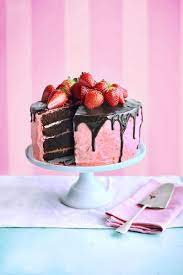

In [91]:
#Opening up google images website on automated chrome window

url = 'https://www.google.co.in/imghp?hl=en&ogbl'
driver.get(url)

#finding the web element for the Search bar and enter Cakes
search_prod = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input") 
search_prod.send_keys('Cakes')

#clicking using absolute xpath function to click the search button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
search_btn.click()

#fetching Url of images for 10 images in the search page

Img_url5 = []
url = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in url:
    Img_url5.append(i.get_attribute('src')) #to retrieve any link we use get attribute
    time.sleep(0)
Img_url5[10]

# Exercise 4:

## python program to search for a smartphone

In [119]:
#Opening up Flipkart website on automated chrome window

url = 'https://www.flipkart.com/'
driver.get(url)

In [122]:
#finding the web element for the Search bar and enter user input
Product = input('Type the name of the product you wish to search for ')
search_prod = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input") 
search_prod.send_keys(Product)

#clicking using absolute xpath function to click the search button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button")
search_btn.click()

Type the name of the product you wish to search for Oneplus Nord


In [ ]:
#clicking using absolute xpath function to click the search button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_btn.click()

In [125]:
#fetching Url to open each product page

Prod_url =[]

start = 0

end = 1

for page in range(start,end):
    url = driver.find_elements(By.XPATH,'//a[@class="s1Q9rs"]')
    for i in url:
        Prod_url.append(i.get_attribute('href')) #to retrieve any link we use get attribute
    next_button = driver.find_element(By.XPATH,'//a[@class="_1LKTO3"]') #to scrap data from the next page 
    next_button.click()
    time.sleep(1)

In [127]:
len(Prod_url)

40

In [132]:
#To scrap data from multiple pages with brand name alone from Flipkart 

brand_name  = []
prod_name  = []

for i in Prod_url:
    driver.get(i)
    time.sleep(0)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[1]/div[1]/div/div[4]/a')
        desc1 = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        brand_name.append(description.text)
        prod_name.append(desc1.text)
    except NoSuchElementException :
        brand_name.append('-')
        prod_name.append('-')
   

In [206]:
#To scrap data from multiple pages with brand name alone from Flipkart 

Colour  = []
RAM  = []
Storage = []
Primary_Camera = []
Secondary_Camera = []
Display_Size = []
Battery_capacity = []
Price = []


for i in Prod_url:
    driver.get(i)
    time.sleep(2)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div[1]/div/div')
        Price.append(description.text)
        driver.find_element(By.XPATH,"//button[@class='_2KpZ6l _1FH0tX']").click() # Finding the Read More button and clicking it
        time.sleep(1)
    
    
    # Storing all the table rows
        model=driver.find_elements(By.XPATH,"//tr[@class='_1s_Smc row']")
        
    # Iterating through the Table rows to get required data
        for name in model:
            text1= name.find_element(By.XPATH,"td[1]").text # Storing text for first Table Data for each row to check 'if' condition
    # Extracting Phone Color
            if text1=='Color':
                Colour.append(name.find_element(By.XPATH,"td[2]").text)
    # Extracting RAM Memory
            if text1=='RAM':
                 RAM.append(name.find_element(By.XPATH,"td[2]").text)
    # Extracting Internal Storage(ROM)
            if text1=='Internal Storage':
                 Storage.append(name.find_element(By.XPATH,"td[2]").text)
    # Extracting Primary Camera Details
            if text1=='Primary Camera':
                  Primary_Camera.append(name.find_element(By.XPATH,"td[2]").text)
    # Extracting Secondary Camera Details
            if text1=='Secondary Camera':
                  Secondary_Camera.append(name.find_element(By.XPATH,"td[2]").text)
    # Extracting Display Size
            if text1=='Display Size':
                  Display_Size.append(name.find_element(By.XPATH,"td[2]").text)
    # Extracting Battery Capacity
            if text1=='Battery Capacity':
                  Battery_capacity.append(name.find_element(By.XPATH,"td[2]").text)
       
    except NoSuchElementException :  
            Colour.append('-')
            RAM.append('-')
            Storage.append('-')
            Primary_Camera.append('-')
            Secondary_Camera.append('-')
            Display_Size.append('-')
            Battery_capacity.append('-')
            Price.append('-')


In [209]:
print(len(brand_name),len(prod_name),len(Colour),len(RAM),len(Storage),len(Primary_Camera),len(Secondary_Camera),len(Display_Size),len(Storage),len(Battery_capacity),len(Price))

40 40 40 40 40 39 5 40 40 40 40


WE need to treat the columns having less than 40 as we cant make a dataframe if its not equal

In [215]:
Secondary_Camera

['-', '-', '-', '16MP Front Camera', '-']

In [216]:
x='-'
Secondary_Camera.extend([x] * 35) 

#using Extend function to add in the missing values as when the table did not append '-' as we expected

In [217]:
len(Secondary_Camera) # we have got equal rows and columns 

40

In [218]:
Primary_Camera.append('-') #balancing this list as well from 39 to 40 by adding a '-'

In [219]:
#Doing a chcek to make sure all the lists are same size to make a dataframe
print(len(brand_name),len(prod_name),len(Colour),len(RAM),len(Storage),len(Primary_Camera),len(Secondary_Camera),len(Display_Size),len(Storage),len(Battery_capacity),len(Price))

40 40 40 40 40 40 40 40 40 40 40


In [220]:
#Creating a DataFrame with the extracted elements
import pandas as pd

Product1 = pd.DataFrame()
Product1['Brand_name'] = brand_name
Product1['Product name'] = prod_name
Product1['Colour'] = Colour
Product1['RAM'] = RAM
Product1['Storage'] = Storage
Product1['Primary Camera'] = Primary_Camera
Product1['Secondary Camera'] = Secondary_Camera
Product1['Display Size'] = Display_Size
Product1['Storage'] = Storage
Product1['Battery capacity'] = Battery_capacity
Product1['Price'] = Price
Product1['Product Link'] = Prod_url

In [383]:
Product1.head()

,Brand_name,Product name,Colour,RAM,Storage,Primary Camera,Secondary Camera,Display Size,Battery capacity,Price,Product Link
0,OnePlus Mobiles,"OnePlus Nord N20 SE (Blue Oasis, 64 GB) (4 GB...",Blue Oasis,4 GB,64 GB,50MP Rear Camera,-,16.66 cm (6.56 inch),5000 mAh,"₹14,499",https://www.flipkart.com/oneplus-nord-n20-se-b...
1,OnePlus Mobiles,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Blue Tide,6 GB,128 GB,64MP Rear Camera,-,16.74 cm (6.59 inch),5000 mAh,"₹19,790",https://www.flipkart.com/oneplus-nord-ce-2-lit...
2,OnePlus Mobiles,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",-,-,-,-,-,-,-,-,https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,OnePlus Mobiles,"OnePlus Nord N20 SE (Blue Oasis, 64 MB) (4 MB...",Blue Oasis,4 MB,64 MB,50MP Rear Camera,16MP Front Camera,16.66 cm (6.56 inch),5000 mAh,"₹14,499",https://www.flipkart.com/oneplus-nord-n20-se-b...
4,OnePlus Mobiles,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...",Black Dusk,6 GB,128 GB,64MP Rear Camera,-,16.74 cm (6.59 inch),5000 mAh,"₹19,981",https://www.flipkart.com/oneplus-nord-ce-2-lit...


In [227]:
#Creating  file csv to file 

Product1.to_csv('Product_flipkart.csv', index =True)

In [247]:
driver.close()

# Exercise 5:

## scrap geospatial coordinates (latitude, longitude) of a city searched on google maps

In [92]:
#Opening up google maps  website on automated chrome window

url = 'https://www.google.com/maps/'
driver.get(url)

In [102]:
#finding the web element for the Search bar and enter user input which is City 
City = input('Type the name of the city you wish to search for ')
search_prod = driver.find_element(By.XPATH,"/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div/div[2]/form/input[1]") 
search_prod.send_keys(City)

#clicking using absolute xpath function to click the search button after the city is inputted 

search_btn =  driver.find_element(By.XPATH,"/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button")
search_btn.click()

#Using the API fuction to directly scrape data from the google maps website , the details pertaining to LAtitude as well as longitude

from geopy.geocoders import Nominatim
address= City
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print(location.address)
print(('Latitude =', location.latitude, 'Longitude = ',location.longitude))

Type the name of the city you wish to search for Hyderabad
Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, India
('Latitude =', 17.360589, 'Longitude = ', 78.4740613)


### We could have acquired the codes from Google map Api  since they charge money we used this API, but we are getting the accurate results wityh the zipcodes and other info as well from Google maps itself

# Exercise 6 :

## scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21)

In [248]:
driver = webdriver.Chrome('chromedriver.exe') # Lets connect to the web driver

In [249]:
#Opening up trak.in  website on automated chrome window

url = 'https://trak.in/'
driver.get(url)

In [250]:
#clicking using absolute xpath function to click the Funding deals button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/a")
search_btn.click()

In [262]:
#Pulling the data from Apr 2021

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC # expected_conditions module contains a set of predefined conditions to use with WebDriverWait used for the visibility_of_element_located to be able to get the elements in the table as shown on website list  
import pandas as pd
import html5lib
import lxml
from bs4 import BeautifulSoup


data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[2]/div[3]"))).get_attribute("outerHTML")
df = pd.read_html(data)
df[1]
# So finally we see that by using the dataframe from pandas we read the data from html as it is storing the table data as list data and display as dataframe

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,01/04/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000
1,2,05/04/2021,Meesho,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000
2,3,14/04/2021,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000
3,4,07/04/2021,Groww,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000
4,5,14/04/2021,Beldara,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000


In [263]:
#Pulling the data from Jan 2021

data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[5]/div[3]"))).get_attribute("outerHTML")
df = pd.read_html(data)
df[1]
# So finally we see that by using the dataframe from pandas we read the data from html as it is storing the table data as list data and display as dataframe

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,15/01/2021,Digit Insurance,Financial Services,Insurance Services,Bengaluru,"A91 Partners, Faering Capital, TVS Capital Funds",Venture,18000000.0
1,2,28/01/2021,Bombay Shaving Company,Consumer Goods Company,"Shave care, beard care, and skincare products",New Delhi,Reckitt Benckiser,Venture,6172258.5
2,3,19/01/2021,DeHaat,AgriTech Startup,online marketplace for farm products and services,Patna,Prosus Ventures,Series C,30000000.0
3,4,19/01/2021,Darwinbox,SaaS,HR Tech,Mumbai,Salesforce Ventures,Seed,15000000.0
4,5,18/01/2021,mfine,Health Tech Startup,AI-powered telemedicine mobile app,Bengaluru,Heritas Capital Management,Venture Round,16000000.0
5,6,18/01/2021,Udayy,EdTech,Online learning platform for kids in class 1-5,Gurgaon,Sequoia Capital,Seed Funding,15000000.0
6,7,11/01/2021,True Elements,Food Startup,Whole Food plant based Nashta,Pune,SIDBI Venture Capital,Series,100000000.0
7,8,13/01/2021,Saveo,B2B E-commerce,Pharmacies,Bengaluru,"Matrix Partners India, RTP Global, others",Seed,4000000.0


In [264]:
#Pulling the data from Feb 2021

data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[4]/div[3]"))).get_attribute("outerHTML")
df = pd.read_html(data)
df[1]
# So finally we see that by using the dataframe from pandas we read the data from html as it is storing the table data as list data and display as dataframe

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,11/02/2021,Doubtnut,Edu Tech,E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,2500000.0
1,2,22/02/2021,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,250000000.0
2,3,19/02/2021,Fingerlix,Hospitality,Semi-cooked food delivery app,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,2747045.2
3,4,17/02/2021,Zolve,FinTech,Global Neobank Venture,Mumbai,Accel Partners and Lightspeed Venture Partners,Seed,15000000.0
4,5,15/02/2021,KreditBee,Finance,Digital lending platform,Bengaluru,Azim Premji’s PremjiInvest and South Korea’s M...,Series C,75000000.0
5,6,12/02/2021,Pepperfry,E-commerce,Multi-brand furniture brand,Mumbai,InnoVen Capital,Debt Financing,4773958.0
6,7,12/02/2021,Grofers,E-Commerce,Online supermarket,Gurgaon,SoftBank Vision Fund (SVF),Unspecified,55000000.0
7,8,09/02/2021,Nothing,Technology,Consumer Technology Venture,London,GV,Series A,15000000.0
8,9,09/02/2021,SplashLearn,EdTech,Game-based learning programme,Gurgaon,Owl Ventures,Series C,18000000.0


In [265]:
#Pulling the data from Mar 2021

data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[3]/div[3]"))).get_attribute("outerHTML")
df = pd.read_html(data)
df[1]
# So finally we see that by using the dataframe from pandas we read the data from html as it is storing the table data as list data and display as dataframe

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,04/03/2021,DealShare,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,250000000
1,2,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,140000000
2,3,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,8000000
3,4,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,460000000
4,5,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,300000000
5,6,25/03/2021,CityMall,E-commerce,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,11000000
6,7,26/03/2021,DotPe,FinTech,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,27500000


# Exercise 7:

## scrap all the available details of best gaming laptops from digit.in

In [268]:
#Opening up digit.in  website on automated chrome window

url = 'https://www.digit.in'
driver.get(url)

In [269]:
#clicking using absolute xpath function to click the LAptops button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/div/div[4]/ul/li[3]/a")
search_btn.click()

search_btn =  driver.find_element(By.XPATH,"/html/body/div[6]/div/div[1]/div[4]/div/div/a[2]")
search_btn.click()




In [270]:
#Lets extract all the elements having laptop titles

laptop_titles = []
title_tags = driver.find_elements(By.XPATH,"//div[@class='TopNumbeHeading']")
for i in title_tags:
    laptop_titles.append(i.text)
laptop_titles

['1.\nApple 16-Inch MacBook Pro M1 Max',
 '3.\nDell New XPS 13 Plus',
 '4.\nApple MacBook Air M2',
 '5.\nAcer Nitro 5',
 '6.\nLenovo IdeaPad Gaming 3i',
 '7.\nAcer Swift X']

In [273]:
#Lets extract all the elements having the specifications features

specifications = []
title_tags = driver.find_elements(By.XPATH,"//div[@class='Spcs-details']")
for i in title_tags:
    specifications.append(i.text.split('\n'))
specifications

[['MORE SPECIFICATIONS',
  'Processor : 10-core processor with 3.1 GHz clock speed',
  'Display : 16.2″ (3456 x 2234) screen',
  'OS : Mac Monterey',
  'Memory : 32 GB DDR4 RAM & 1 TB SSD',
  'Body : 355.7 x 248.1 x 16.8 mm dimension & 2.2 kg weight',
  'Price : ₹ 306,990'],
 ['MORE SPECIFICATIONS',
  'Processor : 11th Gen Intel Core i7-1185G7 4 core processor with 3.00 GHz clock speed',
  'Display : 14″ (1920 x 1080) screen',
  'OS : Windows 10 Home',
  'Memory : 16 GB DDR4 RAM & 1 TB SSD',
  'Graphics Processor : Intel Iris Xe Graphics card',
  'Body : 319.4 x 216.4 x 15.7 mm dimension & 1.37 kg weight',
  'Price : ₹ 178,490'],
 ['MORE SPECIFICATIONS',
  'Processor : 12th Gen Intel EVO Core i7-1260P processor with 3.40 GHz clock speed',
  'Display : 13.4″ (3840 x 2160) screen',
  'OS : Windows 11',
  'Memory : 16 GB DDR5 RAM & 1 TB SSD',
  'Graphics Processor : Intel Iris Xe Graphics card',
  'Body : 199 x 295 x 15 mm dimension & 1.24 kg weight',
  'Price : ₹ 215,000'],
 ['MORE SPECI

In [275]:
driver = webdriver.Chrome('chromedriver.exe') # Lets connect to the web driver

# Exercise 8:

## scrape details for all billionaires from www.forbes.com.

In [276]:
#Opening up www.forbes.com.  website on automated chrome window

url = 'https://www.forbes.com.'
driver.get(url)

In [281]:
#clicking using absolute xpath function to click the Menu button

search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div/div/div[1]")
search_btn.click()


In [282]:
#Clicking on the billionaires option in dropdown
search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[1]")
search_btn.click()

In [284]:
#Clicking on all billionaires option
search_btn =  driver.find_element(By.XPATH,"/html/body/div[1]/main/div/section/section[1]/div/div/div[1]/div/div[1]/div[1]/div[2]/a/h2")
search_btn.click()

In [288]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC # expected_conditions module contains a set of predefined conditions to use with WebDriverWait used for the visibility_of_element_located to be able to get the elements in the table as shown on website list  
import pandas as pd
import html5lib
import lxml
from bs4 import BeautifulSoup

In [367]:
#To fetch the billionaires data from all the pages we use a loop function

Rank_data =[]
Name_data=[]
NetWorth_data = []
Country_data = []
Source_data = []
Age_data = []
Industry_data = []


start = 0

end = 13

for page in range(start,end):
    Rank = driver.find_elements(By.XPATH,'//div[@class="rank"]')
    Name = driver.find_elements(By.XPATH,'//div[@class="personName"]')
    Networth = driver.find_elements(By.XPATH,'//div[@class="netWorth"]')
    Country = driver.find_elements(By.XPATH,'//div[@class="countryOfCitizenship"]')
    Source = driver.find_elements(By.XPATH,'//div[@class="source"]')
    Age = driver.find_elements(By.XPATH,'//div[@class="age"]')
    Industry = driver.find_elements(By.XPATH,"//div[@class='category']")
    wait_button = WebDriverWait(driver, 10)
    for i in Rank:
        Rank_data.append(i.text)
    for i in Name:
        Name_data.append(i.text)
    for i in Networth:
        NetWorth_data.append(i.text)
    for i in Country:
        Country_data.append(i.text)        
    for i in Source:
        Source_data.append(i.text)
    for i in Age:
        Age_data.append(i.text)    
    for i in Industry:
        Industry_data.append(i.text)
    next_button = driver.find_element(By.XPATH,'//button[@class="pagination-btn pagination-btn--next "]') #to scrap data from the next page 
    next_button.click()
    time.sleep(3)

In [369]:
#After extrating the data we chcek to see if all the columns have the data from all the pages

print(len(Rank_data),len(Name_data),len(NetWorth_data),len(Country_data),len(Source_data),len(Age_data),len(Industry_data))

2600 2600 2600 2600 2600 2600 2600


# Exercise 9:

## to extract at least 500 Comments, Comment upvote and time when comment was posted

In [370]:
#Opening up youtube video link website on automated chrome window

url = 'https://www.youtube.com/watch?v=S5bBxyDkMhM'
driver.get(url)

In [ ]:
# Extracting the Comments upvotes as well the time the comment was posted using the lambda function 

In [376]:
Comment = list(map(lambda x: x.text, driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-comment-renderer"]')))
Upvote = list(map(lambda x: x.text, driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]')))
Time = list(map(lambda x: x.text, driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')))

In [380]:
print(len(Comment[:500]),len(Upvote[:500]),len(Time[:500])) #showing the length of the columns as 500

500 500 500


# Exercise 10:

## scrape a data for all available Hostels from https://www.hostelworld.com/ in

In [136]:
#Opening up https://www.hostelworld.com/ in website on automated chrome window

url = 'https://www.hostelworld.com/in'
driver.get(url)

In [141]:
#finding the web element for the Location bar 

location = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[1]/div[1]/div/div/div[1]/div/div/div/label/input')
location.send_keys("London")

In [142]:
#clicking the dropdown and selecting the required location

search_btn = driver.find_element(By.XPATH,"/html/body/div[1]/div/div/div/div[1]/div[1]/div/div/div[1]/div/div/ul/li[2]/div/span")
search_btn.click()

In [143]:
#clicking the Search Button to get all the required results

search_btn = driver.find_element(By.XPATH,"/html/body/div[1]/div/div/div/div[1]/div[1]/div/div/div[5]/button")
search_btn.click()

In [192]:
#fetching Urls from the search results to open each product page and get the desired features

Hostel_url=[]

url = driver.find_elements(By.XPATH,"//h2[@class='title title-6']//a")
for i in url:
    Hostel_url.append(i.get_attribute('href')) #to retrieve any link we use get attribute


In [193]:
Hostel_url # we have acquired all the links in the list to scrpae the hostel features

['https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-City-Hostel-London/London/88047?from=2022-11-25&to=2022-11-28&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2022-11-25&to=2022-11-28&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2022-11-25&to=2022-11-28&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Elephant-Castle/London/55551?from=2022-11-25&to=2022-11-28&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Kensington-Holland-Park/London/93920?from=2022-11-25&to=2022-11-28&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Camden/London/505?from=2022-11-25&to=2022-11-28&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Hammersmith/London/20976?from=2022-11-25&to=2022-11-28&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Smart-Hyde-Park-V

In [194]:
#To scrap data from multiple pages with brand name alone from amazon 

Name  = []
Distance  = []
ratings = []
Total_reviews = []
Overall_reviews = []
Privates_from_Price = []
Dorms_from_price = []
Facilities = []
Description = []


for i in Hostel_url:
    driver.get(i)
    time.sleep(2)
    try:
        a1 = driver.find_elements(By.XPATH,'//div[@class="title-2"]')
        a2 = driver.find_elements(By.XPATH,'//div[@class="personName"]')
        a3 = driver.find_elements(By.XPATH,'//div[@class="score orange big"]')
        a4 = driver.find_elements(By.XPATH,'//div[@class="reviews"]')
        a5 = driver.find_elements(By.XPATH,'//div[@class="keyword"]')
        a6 = driver.find_elements(By.XPATH,'//div[@class="price"]') 
        a7 = driver.find_elements(By.XPATH,'//div[@class="price"]')
        a8 = driver.find_elements(By.XPATH,'//div[@class="facilities"]')
        a9 = driver.find_elements(By.XPATH,"//div[@class='description-container']")
        wait_button = WebDriverWait(driver, 10)
        for i in a1:
            Name.append(i.text)
        for i in a2:
            Distance.append(i.text)
        for i in a3:
            ratings.append(i.text)
        for i in a4:
            Total_reviews.append(i.text)        
        for i in a5:
            Overall_reviews.append(i.text)
        for i in a6:
            Privates_from_Price.append(i.text)    
        for i in a7:
            Dorms_from_price.append(i.text)
        for i in a8:
            Facilities.append(i.text)    
        for i in a9:
            Description.append(i.text)

       
    except NoSuchElementException :  
            Name.append('-')
            Distance.append('-')
            ratings.append('-')
            Total_reviews.append('-')
            Overall_reviews.append('-')
            Privates_from_Price.append('-')
            Dorms_from_price.append('-')
            Facilities.append('-')
            Description.append('-')


In [197]:
Name

["Wombat's City Hostel London",
 "St Christopher's Village",
 'Generator London',
 'Safestay London Elephant & Castle',
 'Safestay London Kensington Holland Park',
 "St Christopher's Camden",
 "St Christopher's Hammersmith",
 'Smart Hyde Park View Hostel',
 'Saint James Backpackers',
 "St Christopher's Greenwich",
 'Selina Camden',
 'PubLove @ The Crown, Battersea',
 'PubLove @ The Green Man, Paddington',
 'Park Villa',
 'London House Hotel',
 'Kip Hotel',
 'Colliers Hotel',
 'Beaconsfield']

In [195]:
Description

["Property Description\nA safe haven in the middle of the metropolis: We took a traditional brick building with roots going back to the 1800s and set a new standard for hostel life in the UK.\nWhat used to be sailors' lodgings in the olden days is now a hostel satisfying all needs of the modern traveler. With great attention to detail, we have created a hostel in London that celebrates the legacy of our historic building.\nOld oak that was previously part of sturdy ships and churches is now immortalized in our furniture throughout the house. The pints you drink here will be served on a bar made from 500-year-old wood. \n\nBut as comfortable as our hostel might be, London's calling - and London's call is hard to ignore, given our location: \nOur Wombat's City Hostel is situated in the London Borough of Tower Hamlets, right next to famous Tower Bridge and Tower of London, charming markets, authentic pubs, and plenty of other historic sights.\nA short walk will see you in the trendy Borou

In [200]:
ratings

['8.9',
 '8.9',
 '8.1',
 '8.1',
 '7.7',
 '7.7',
 '7.1',
 '7.1',
 '6.8',
 '6.8',
 '8.3',
 '8.3',
 '7.8',
 '7.8',
 '7.9',
 '7.9',
 '7.3',
 '7.3',
 '6.7',
 '6.7',
 '8.3',
 '8.3',
 '6.9',
 '6.9',
 '7.7',
 '7.7',
 '7.7',
 '7.7',
 '9.4',
 '9.4',
 '7.1',
 '7.1',
 '6.3',
 '6.3']

In [201]:
Overall_reviews

['Fabulous',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Good',
 'Good',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Good',
 'Good',
 'Fabulous',
 'Fabulous',
 'Good',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Superb',
 'Superb',
 'Very Good',
 'Very Good',
 'Good',
 'Good',
 'No Rating']

In [202]:
Total_reviews

['14326 Total Reviews',
 '14326 Total Reviews',
 '11697 Total Reviews',
 '11697 Total Reviews',
 '7259 Total Reviews',
 '7259 Total Reviews',
 '4681 Total Reviews',
 '4681 Total Reviews',
 '1377 Total Reviews',
 '1377 Total Reviews',
 '3899 Total Reviews',
 '3899 Total Reviews',
 '4156 Total Reviews',
 '4156 Total Reviews',
 '4635 Total Reviews',
 '4635 Total Reviews',
 '1846 Total Reviews',
 '1846 Total Reviews',
 '3278 Total Reviews',
 '3278 Total Reviews',
 '41 Total Reviews',
 '41 Total Reviews',
 '277 Total Reviews',
 '277 Total Reviews',
 '432 Total Reviews',
 '432 Total Reviews',
 '878 Total Reviews',
 '878 Total Reviews',
 '1382 Total Reviews',
 '1382 Total Reviews',
 '55 Total Reviews',
 '55 Total Reviews',
 '9 Total Reviews',
 '9 Total Reviews',
 '0 Total Reviews']

In [203]:
driver.close()